### Challenge 3 - Multivariable Linear Regression

In [202]:
#1) Import needed libraries, clean data
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [203]:
#Fixing dataset formatting for Pandas
#Load datasets
columns = ['O-rings', 'Num of Thermal Distress', 'Launch Temperature', 'Leak-check Pressure', 'Temporal order of flight']
erosion_only = pd.read_csv('o-ring-erosion-only.data', names=columns, header=None)
blowby_data = pd.read_csv('o-ring-erosion-or-blowby.data', names=columns, header=None)
erosion_only['O-rings'] = erosion_only['O-rings'].astype('string')


#Sort out the pandas dataframe to correctly put data in right columns
erosion_only[['O-rings', 'Num of Thermal Distress', 'Launch Temperature', 'Leak-check Pressure', 'Temporal order of flight']] = erosion_only['O-rings'].str.split(expand=True)


blowby_data[['O-rings', 'Num of Thermal Distress', 'Launch Temperature', 'Leak-check Pressure', 'Temporal order of flight']] = blowby_data['O-rings'].str.split(expand=True)
#Getting sorted dataset for Launch Temp graphs
sorted_data_blowby = blowby_data.sort_values('Launch Temperature', ascending=True)
sorted_erosion_only = erosion_only.sort_values('Launch Temperature', ascending=True)
sorted_data_blowby

,O-rings,Num of Thermal Distress,Launch Temperature,Leak-check Pressure,Temporal order of flight
13,6,2,53,200,14
8,6,1,57,200,9
22,6,1,58,200,23
9,6,1,63,200,10
0,6,0,66,50,1
14,6,0,67,200,15
12,6,0,67,200,13
4,6,0,67,50,5
3,6,0,68,50,4
2,6,0,69,50,3


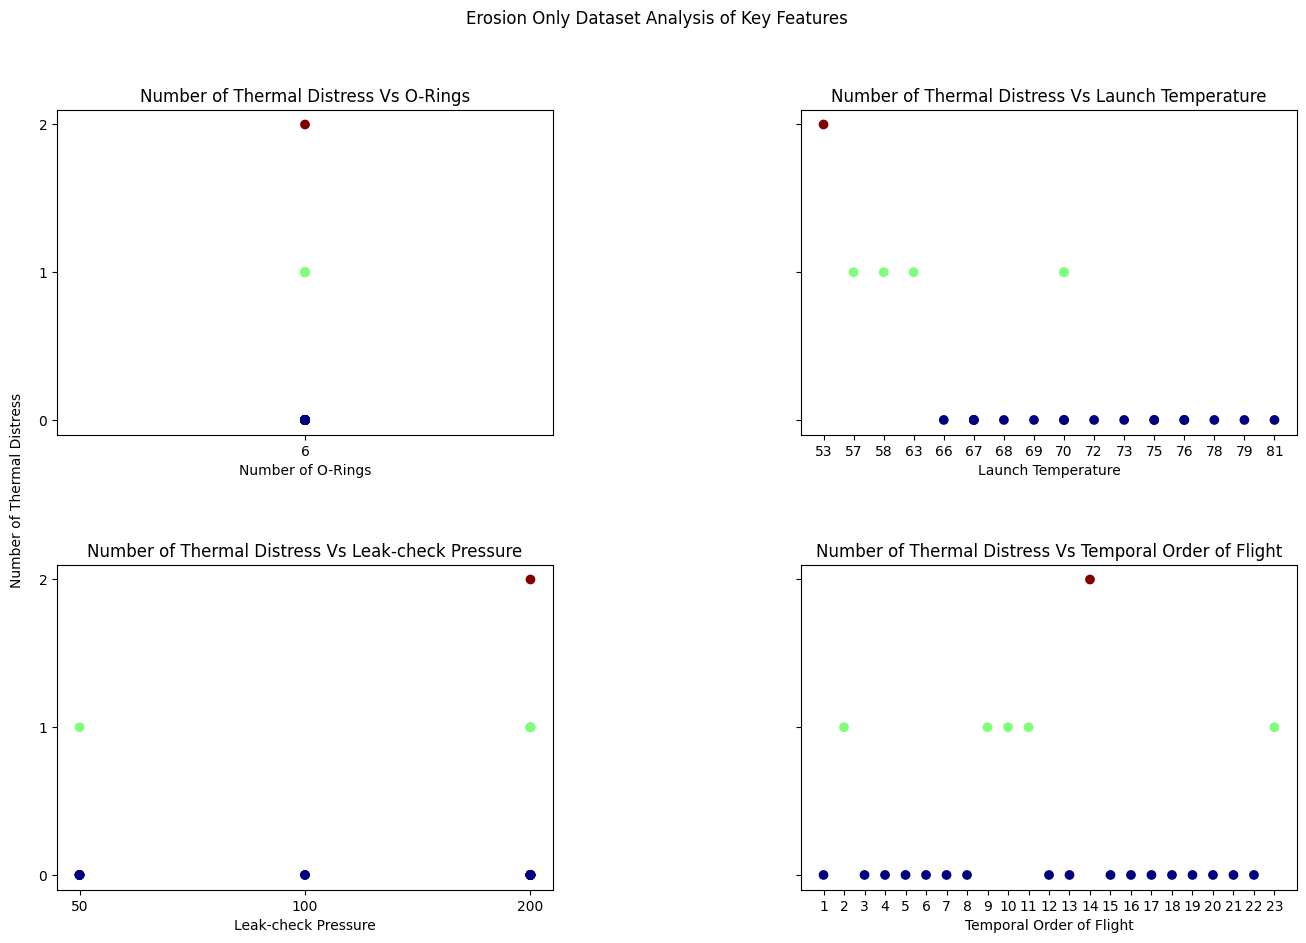

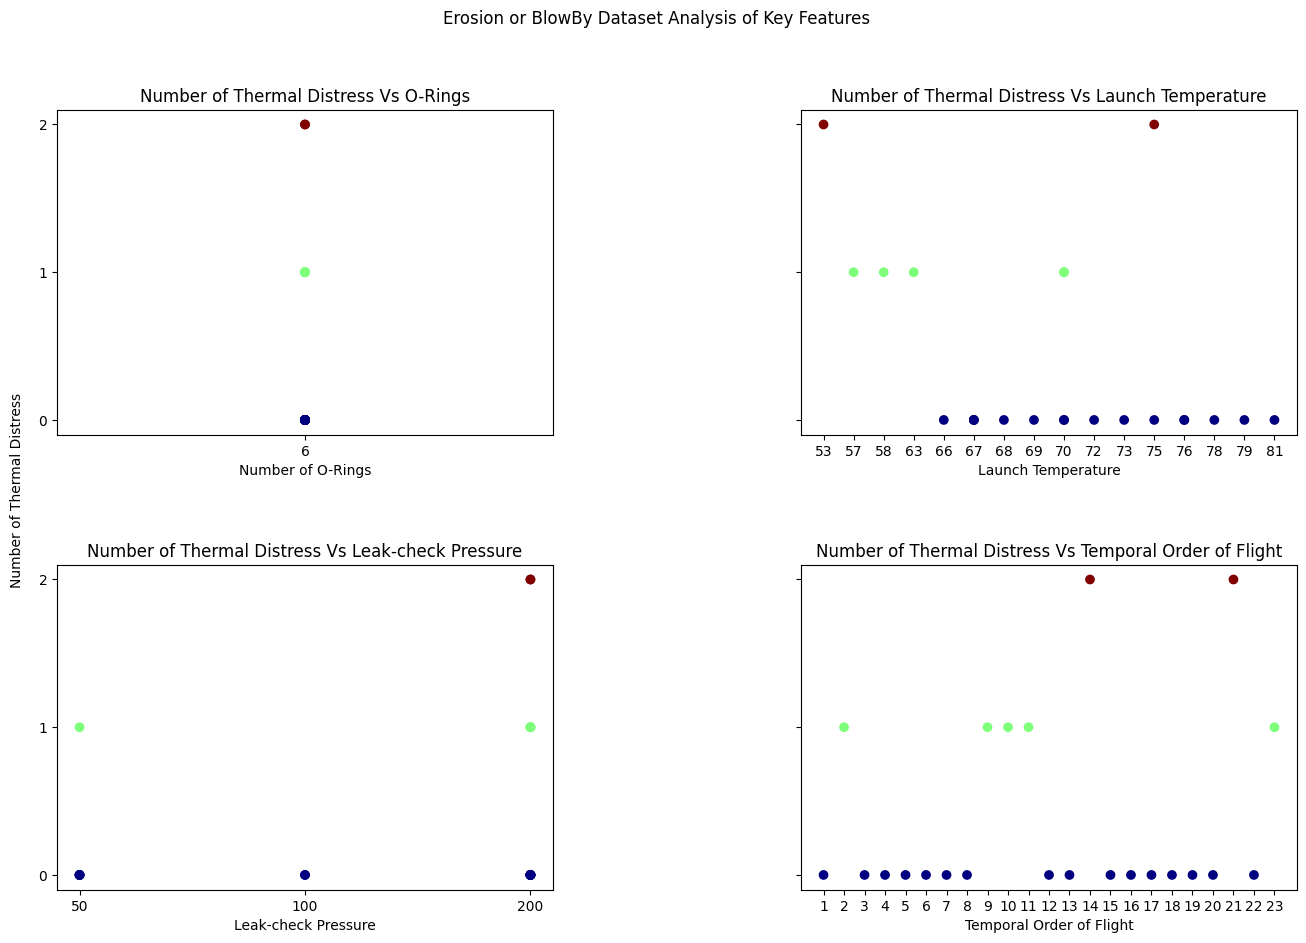

In [206]:
#2)Visualize the Datasets on dependent variable (Number of Thermal Distresses), compare values

#Function for plotting given dataset
def plot_data(dataset,sorted_dataset):
  figure, axis = plt.subplots(2,2, figsize=(16,10), sharey=True)

  figure.text(0.1,0.5, 'Number of Thermal Distress', va='center', ha='center', rotation='vertical')

  if dataset['Num of Thermal Distress'].iloc[20] == '2':
    plt.suptitle("Erosion or BlowBy Dataset Analysis of Key Features")
  else:
    plt.suptitle("Erosion Only Dataset Analysis of Key Features")
  
  colors = dataset['Num of Thermal Distress'].astype('int')
  sorted_colors = sorted_dataset['Num of Thermal Distress'].astype('int')

  #Num of Thermal Distress
  axis[0,0].scatter(dataset['O-rings'],dataset['Num of Thermal Distress'], c=colors, cmap='jet')
  axis[0,0].set_title("Number of Thermal Distress Vs O-Rings")
  axis[0,0].set_xlabel('Number of O-Rings')
  axis[0,0].invert_yaxis()

  #Launch Temp
  axis[0,1].scatter(sorted_dataset['Launch Temperature'],sorted_dataset['Num of Thermal Distress'],c=sorted_colors, cmap='jet')
  axis[0,1].set_title("Number of Thermal Distress Vs Launch Temperature")
  axis[0,1].set_xlabel("Launch Temperature")
  axis[0,1].invert_yaxis()

  #Leak-check Pressure
  axis[1,0].scatter(dataset['Leak-check Pressure'],dataset['Num of Thermal Distress'],c=colors, cmap='jet')
  axis[1,0].set_title("Number of Thermal Distress Vs Leak-check Pressure")
  axis[1,0].set_xlabel("Leak-check Pressure")

  #Temporal order of flight
  axis[1,1].scatter(dataset['Temporal order of flight'],dataset['Num of Thermal Distress'],c=colors, cmap='jet')
  axis[1,1].set_title("Number of Thermal Distress Vs Temporal Order of Flight")
  axis[1,1].set_xlabel("Temporal Order of Flight")

  plt.subplots_adjust(bottom=0.1,wspace=0.5,hspace=0.4)

#erosion only plots
plot_data(erosion_only,sorted_erosion_only)

#erosion and blowby plots
plot_data(blowby_data,sorted_data_blowby)


In [157]:
#3) Extract features from the dataset

#Converting DF Back into numerical columns for test/train sets
erosion_only_LR = erosion_only
rows = len(erosion_only_LR.index)
erosion_only_LR = erosion_only_LR.iloc[:,0:rows].values
erosion_only_LR = pd.DataFrame(erosion_only_LR)

#Get features drop target feature (Number of Thermal Distress Column 1)
X = erosion_only_LR.drop(1, axis=1)
y = erosion_only_LR[1]


blowby_data_LR = blowby_data
rows = len(blowby_data_LR.index)
blowby_data_LR = blowby_data_LR.iloc[:,0:rows].values
blowby_data_LR = pd.DataFrame(blowby_data_LR)

X_b = blowby_data_LR.drop(1,axis=1)
y_b = blowby_data_LR[1]

X_b


,0,2,3,4
0,6,66,50,1
1,6,70,50,2
2,6,69,50,3
3,6,68,50,4
4,6,67,50,5
5,6,72,50,6
6,6,73,100,7
7,6,70,100,8
8,6,57,200,9
9,6,63,200,10


In [175]:
#4) Split data into testing/training sets, fit in Linear Regression model for training set

#For Erosion dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=25)

model = LinearRegression()
model.fit(X_train,y_train)

y_prediction = model.predict(X_test)

mse = mean_squared_error(y_test, y_prediction)
print(f'Mean Square Error for Multivariable Linear Regression model of Only Erosion dataset is : {mse}')

#For Blowby dataset
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b,y_b,test_size=0.2, random_state=25)

model = LinearRegression()
model.fit(X_train_b,y_train_b)

y_prediction_b = model.predict(X_test_b)

mse = mean_squared_error(y_test_b, y_prediction_b)
print(f'Mean Square Error for Multivariable Linear Regression model of Erosion or Blowby dataset is : {mse}')





Mean Square Error for Multivariable Linear Regression model of Only Erosion dataset is : 0.03968934637289754
Mean Square Error for Multivariable Linear Regression model of Erosion or Blowby dataset is : 0.7884944484038395


In [174]:
#5) Evaluate Performance of Model

## Erosion/Blowby Dataset is very inaccurate in its prediction, may be because we are using non-linear relationships to try to predict this model
#Lets test using less features for accuracy increases

def get_test_train_data(dataset,cols : list):
  X = dataset.drop(cols, axis=1)
  y = dataset[1]
  
  num_feat = len(X.columns)
  # print(X)
  # print(y)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=25)

  model = LinearRegression()
  model.fit(X_train,y_train)

  y_prediction = model.predict(X_test)

  mse = mean_squared_error(y_test, y_prediction)
  
  #Checking what Dataset type was passed
  if y.iloc[20] == '2':
    print(f'Mean Square Error for Multivariable Linear Regression model of Erosion and Blowby dataset with {num_feat} features is : {mse}')
  else:
    print(f'Mean Square Error for Multivariable Linear Regression model of Only Erosion dataset with {num_feat} features is : {mse}')

#Using 3 features, drop Number of O-rings
get_test_train_data(erosion_only_LR, [0,1])
get_test_train_data(blowby_data_LR, [0,1])

#Using 2 features, drop Number of O-rings and Temporal order of flights (not linear data compared to our dependent variable)
get_test_train_data(erosion_only_LR, [0,1,4])
get_test_train_data(blowby_data_LR, [0,1,4])


Mean Square Error for Multivariable Linear Regression model of Only Erosion dataset with 3 features is : 0.039689346372897304
Mean Square Error for Multivariable Linear Regression model of Erosion and Blowby dataset with 3 features is : 0.7884944484038404
Mean Square Error for Multivariable Linear Regression model of Only Erosion dataset with 2 features is : 0.04703533440277814
Mean Square Error for Multivariable Linear Regression model of Erosion and Blowby dataset with 2 features is : 0.7614153304201882


## In Conclusion, the performance of the Linear Regression model is heavily affected by the added outlier in the Erosion and Blowby dataset. Our Mean Square Error increased by 70% when this outlier was added to the prediction model. To fix the extremely high MSE of the Erosion and Blowby dataset, it can be concluded we need to remove this outlier (Point 21 of the dataset)

# Also, it can also be concluded that although Multivariable Linear Regression was done in this analysis, the only data that was fit to a Linear Model for our dependent variable (Number of Thermal Distresses) was the temperature of the flight when it was launched. Although, it does seem like the leak-check pressure has a polynomial relationship with the Number of Thermal Distresses.